# A03: Sampling
-------------
**Dr. Dave Wanik - Operations and Information Management - University of Connecticut**

Author @Dr. Dave Wanik

Adaptations made by Madison Sobol

## Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load in housing data + inspect
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
# Check shape
df.shape

(17000, 9)

In [4]:
# Check for NaNs
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [5]:
# Drop any NaNs
df.dropna(inplace=True, axis=0)
print(df.shape)

(17000, 9)


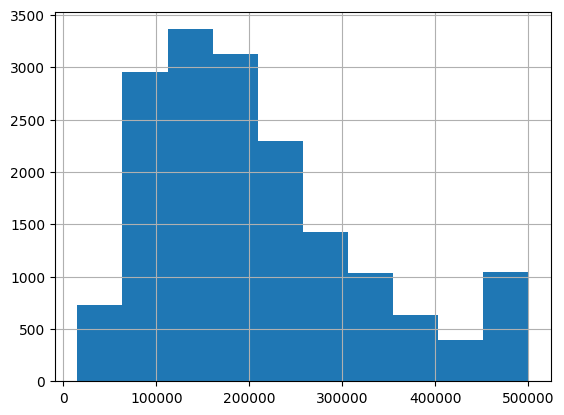

In [6]:
# Plot median house value distribution
df['median_house_value'].hist()
plt.show()

In [7]:
# Create a new target variable for SMOTE
df['median_house_value'] = np.where(df['median_house_value'] < 380000, 1, 0) # Condition, True response, False response
df['median_house_value'].value_counts() # Data is imbalanced

,count
median_house_value,
1,15304
0,1696


# Split data into train and test


In [8]:
# Split data into X and Y
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [9]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Majority Undersampling


In [10]:
# use imblearn to perform majority undersampling on X_train, evaluate on test partition

In [11]:
# Define sampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# Fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)

# Summarize class distribution
# This makes sense! we should produce a value less than our original majority, closer to our minority count
print(Counter(y_under))

Counter({0: 1344, 1: 1344})


In [12]:
# Define classifer model and fit
clf = MLPClassifier(random_state=42,
                   hidden_layer_sizes=(10,5),
                   max_iter=200,
                   batch_size=10,
                   activation="relu",
                   validation_fraction=0.2,
                   early_stopping=True) # important!
clf.fit(X_under, y_under)

MLPClassifier(batch_size=10, early_stopping=True, hidden_layer_sizes=(10, 5),
              random_state=42, validation_fraction=0.2)

In [13]:
# Predict test
y_pred_test  = clf.predict(X_test)

In [14]:
# Evaluation functions from @Dr.Dave
def pretty_classification_report(y_true, y_pred):
    rpt = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    df = pd.DataFrame(rpt).transpose()
    # Clean up column names and order
    cols = ["precision", "recall", "f1-score", "support"]
    df = df[cols]
    return df

def pretty_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    df = pd.DataFrame(cm, index=["Actual 0","Actual 1"], columns=["Pred 0","Pred 1"])
    return df

In [15]:
# Evaluating testing
print("CLASSIFICATION REPORT:")
print(pretty_classification_report(y_test,y_pred_test))
print("\nCONFUSION MATRIX:")
print(pretty_confusion_matrix(y_test,y_pred_test))

#Based on f1-score in the classification report, the model performs okay.
#Model precision is higher than recall, indicating that the model does not always identify the relevent element.
#The confusion matrix demonstrates the models ability to correctly classify some of the data.
#However, there is a large portion of false negatives, indicating that the model is struggling with picking out all relevant data.
#Regardless, the classification report and confusion matrix prove that this model is the best out of the three.

CLASSIFICATION REPORT:
              precision    recall  f1-score      support
0              0.465185  0.892045  0.611490   352.000000
1              0.986055  0.881562  0.930885  3048.000000
accuracy       0.882647  0.882647  0.882647     0.882647
macro avg      0.725620  0.886804  0.771187  3400.000000
weighted avg   0.932130  0.882647  0.897818  3400.000000

CONFUSION MATRIX:
          Pred 0  Pred 1
Actual 0     314      38
Actual 1     361    2687


# (15 pts) Minority Oversampling
Perform minority oversampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

In [16]:
# use imblearn to perform minority oversampling on X_train, evaluate on test partition

In [17]:
# Define sampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Summarize class distribution
# This makes sense! we should produce a value higher than our minority, closer to our majority count
print(Counter(y_over))

Counter({0: 12256, 1: 12256})


In [18]:
# Define classifer model and fit
clf = MLPClassifier(random_state=42,
                   hidden_layer_sizes=(10,5),
                   max_iter=200,
                   batch_size=10,
                   activation="relu",
                   validation_fraction=0.2,
                   early_stopping=True) # important!
clf.fit(X_over, y_over)

MLPClassifier(batch_size=10, early_stopping=True, hidden_layer_sizes=(10, 5),
              random_state=42, validation_fraction=0.2)

In [19]:
# Predict test
y_pred_test  = clf.predict(X_test)

In [20]:
# Evaluating testing
print("CLASSIFICATION REPORT:")
print(pretty_classification_report(y_test,y_pred_test))
print("\nCONFUSION MATRIX:")
print(pretty_confusion_matrix(y_test,y_pred_test))

#Based on f1-score in the classification report, this model performs okay - slightly worse than the one trained with the majority undersampling technique.
#The recall is slightly reduced compared to the first model, indicating that this model is worse at picking out our element of interest.
#The confusion matrix demonstrates the models ability to correctly classify some of the data.
#There is still a significant portion of false negatives, indicating that the model is struggling with picking out all relevant data.

CLASSIFICATION REPORT:
              precision    recall  f1-score      support
0              0.456897  0.903409  0.606870   352.000000
1              0.987426  0.875984  0.928373  3048.000000
accuracy       0.878824  0.878824  0.878824     0.878824
macro avg      0.722161  0.889697  0.767621  3400.000000
weighted avg   0.932501  0.878824  0.895088  3400.000000

CONFUSION MATRIX:
          Pred 0  Pred 1
Actual 0     318      34
Actual 1     378    2670


# (15 pts) SMOTE
Perform synthetic minority oversampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

In [21]:
# use imblearn to perform synthetic minority data on X_train, evaluate on test partition

In [22]:
# Create synthetic data with imblearn
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train) # only for numeric!
Counter(y_res)

Counter({0: 12256, 1: 12256})

In [23]:
# Define classifer model and fit
clf = MLPClassifier(random_state=42,
                   hidden_layer_sizes=(10,5),
                   max_iter=200,
                   batch_size=10,
                   activation="relu",
                   validation_fraction=0.2,
                   early_stopping=True) # important!
clf.fit(X_res, y_res)

MLPClassifier(batch_size=10, early_stopping=True, hidden_layer_sizes=(10, 5),
              random_state=42, validation_fraction=0.2)

In [24]:
# Predict test
y_pred_test  = clf.predict(X_test)

In [25]:
# Evaluating testing
print("CLASSIFICATION REPORT:")
print(pretty_classification_report(y_test,y_pred_test))
print("\nCONFUSION MATRIX:")
print(pretty_confusion_matrix(y_test,y_pred_test))

#Based on f1-score in the classification report, the model seems to perform okay. However, the first two were better (higher f1-score).
#The recall slightly decreased, indicating that the model is less skillful in correctly classifying the data and identifying our element of interest.
#The confusion matrix demonstrates the models ability to correctly classify some of the data.
#There is still a significant portion of false negatives, indicating that the model is struggling with picking out all relevant data.

CLASSIFICATION REPORT:
              precision    recall  f1-score      support
0              0.434959  0.911932  0.588991   352.000000
1              0.988355  0.863189  0.921541  3048.000000
accuracy       0.868235  0.868235  0.868235     0.868235
macro avg      0.711657  0.887560  0.755266  3400.000000
weighted avg   0.931062  0.868235  0.887112  3400.000000

CONFUSION MATRIX:
          Pred 0  Pred 1
Actual 0     321      31
Actual 1     417    2631


# (5 pts) Comparison of 3 methods
Out of the three methods, did any do the best? Make a few comments about what you see.

In [26]:
#Based on the evaluation metrics, I believe the first model performed the best (majority undersampling).
#The first model had the highest f1-score, recall, and precision.
#Additionally, the model had the lowest number of false negatives, meaning the model was most skillful in correctly classifying data and identifying our element of interest.

# (40 pts) Reproducibility - run it 30 times or more!
This is one is a little tougher - choose any method and replicate it at least 30 times using a for loop. This means you will split into train and test 30 times (which means you should choose a random_state equal to 'i' as your for loop spins.)

The purpose of this is so that you can show the distribution (hopefully a bell curve but not necessarily) of accuracy, precision and recall. Do some folds get predicted better than others?



In [27]:
# Split data into X and Y
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

In [28]:
# Create empty lists
accuracy = []
precision = []
recall = []

# Split into train + test 30x
for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                  random_state = i)
  # Scale the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test  = scaler.transform(X_test)

  # Define sampling strategy
  oversample = RandomOverSampler(sampling_strategy='minority')

  # Fit and apply the transform
  X_over, y_over = oversample.fit_resample(X_train, y_train)

  # Run model
  clf = MLPClassifier(random_state=42,
                   hidden_layer_sizes=(10,5),
                   max_iter=200,
                   batch_size=10,
                   activation="relu",
                   validation_fraction=0.2,
                   early_stopping=True) # important!
  clf.fit(X_over, y_over)

  # Predict test
  y_pred_test  = clf.predict(X_test)

  # Store metrics
  accuracy.append(accuracy_score(y_test,y_pred_test))
  precision.append(precision_score(y_test,y_pred_test))
  recall.append(recall_score(y_test,y_pred_test))


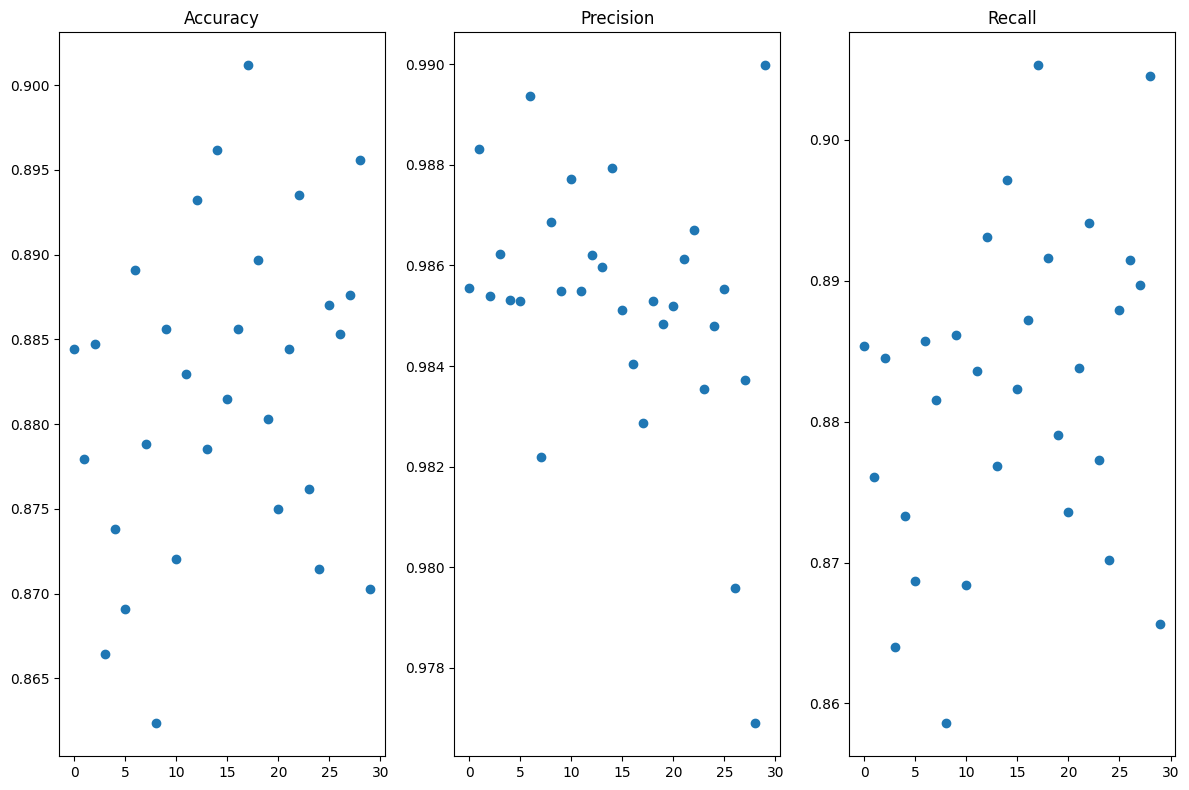

In [36]:
# Plot distribution
fig, axes = plt.subplots(ncols=3,nrows=1,tight_layout=True, figsize=(12,8))

ax=axes[0]
ax.scatter(range(30),accuracy)
ax.set_title("Accuracy")

ax=axes[1]
ax.scatter(range(30),precision)
ax.set_title("Precision")

ax=axes[2]
ax.scatter(range(30),recall)
ax.set_title("Recall")

plt.show()

#Some folds are definitely predicted better than others!

# (5 pts) Comments on the repeated experiment
Make some comments about what you saw! Feel free to run 100 or 1000 times if it runs fast enough 😏

In [35]:
#I do not observe a clear bell curve distribution for accuracy, precision, or recall.
#Accurary and recall slightly resemble a bell curve, with the highest accuracy and recall being around the middle of the distribution.
#Across all runs, the precision appears to be high and more consistent compared to the other metrics, suggesting that the model has good prediction consistency.
#If this loop ran faster, I would be interested to see how the distribution of these metrics could change with increased runs.